#**Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.**

#Data Description:
##Murder -- Muder rates in different places of United States
##Assualt- Assualt rate in different places of United States
##UrbanPop - urban population in different places of United States
##Rape - Rape rate in different places of United States


In [5]:
import pandas as pd
dc= pd.read_csv('/content/crime_data.csv')
dc


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
dc.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
dc

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
dc.shape

(50, 5)

In [8]:
dc.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
dc.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
# Standardization

from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()

dc.iloc[:,1:5] = MM.fit_transform(dc.iloc[:,1:5])
dc

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465
5,Colorado,0.427711,0.544521,0.779661,0.811370
6,Connecticut,0.150602,0.222603,0.762712,0.098191
7,Delaware,0.307229,0.660959,0.677966,0.219638
8,Florida,0.879518,0.993151,0.813559,0.635659
9,Georgia,1.000000,0.568493,0.474576,0.478036


In [27]:
#k-mean

In [18]:

import warnings as wr
wr.filterwarnings('ignore')
from sklearn.cluster import KMeans

Inertia_Value = []

for i in range(1,10):
    Kmeans = KMeans(n_clusters=i , random_state=45)
    Kmeans.fit(dc.iloc[:,1:5])
    Inertia_Value.append(Kmeans.inertia_)
print(Inertia_Value)


[13.184122550256447, 6.596893867946196, 5.010878493006417, 3.6834561535859134, 3.1842618139677223, 2.903479372843045, 2.5779994984512586, 2.288134121879598, 2.1173095931396055]


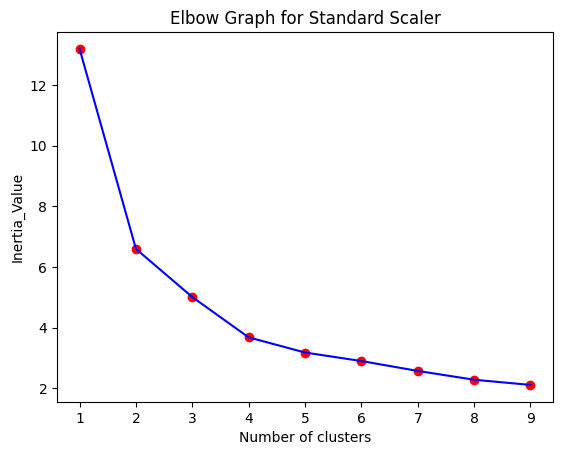

In [19]:

import matplotlib.pyplot as plt
plt.plot(range(1,10),Inertia_Value,color = 'blue')
plt.scatter(range(1,10),Inertia_Value,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia_Value')
plt.show()

In [21]:
# Cluster algorithm
from sklearn.cluster import KMeans
Clust_new = KMeans(5,random_state=45)
km = Clust_new.fit(dc.iloc[:,1:5])
Clust_new.labels_

array([3, 2, 2, 0, 2, 2, 4, 0, 2, 3, 4, 1, 2, 0, 1, 0, 0, 3, 1, 2, 4, 2,
       1, 3, 0, 1, 1, 2, 1, 4, 2, 2, 3, 1, 4, 0, 0, 4, 4, 3, 1, 3, 2, 4,
       1, 0, 4, 1, 1, 0], dtype=int32)

In [26]:
# Hierarchical

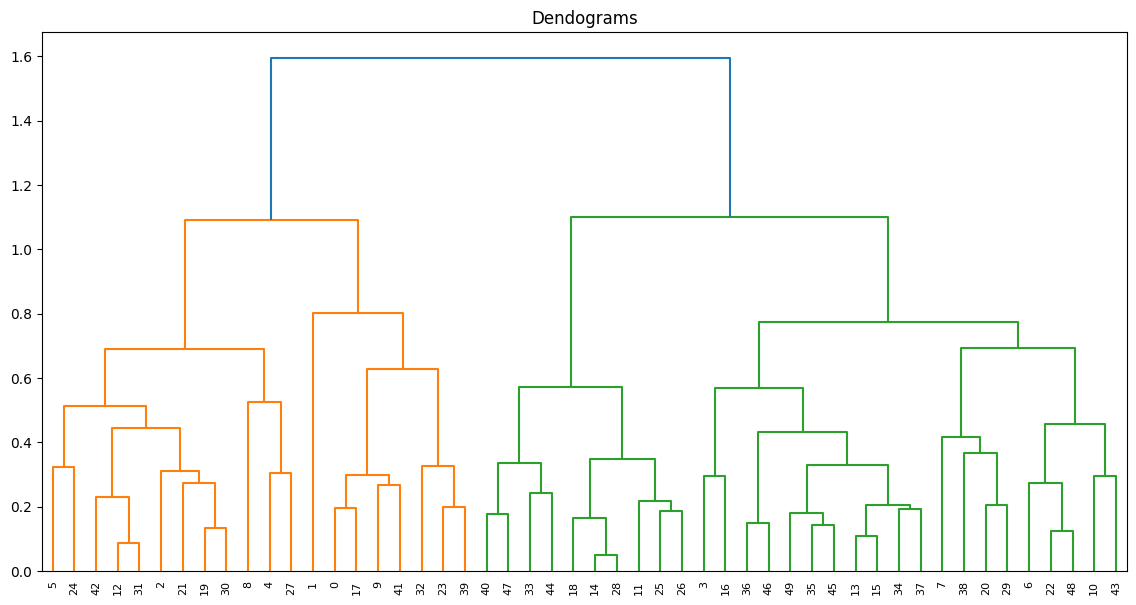

In [22]:
# Dendrogram

import scipy.cluster.hierarchy as SCH
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.title("Dendograms")
Dendrogram = SCH.dendrogram(SCH.linkage(dc.iloc[:,1:5] ,method ="complete"))


In [23]:
# Creating a clusters
from sklearn.cluster import AgglomerativeClustering
Cluster =  AgglomerativeClustering(n_clusters=5, metric = "euclidean", linkage = "complete")

HC= Cluster.fit_predict(dc.iloc[:,1:5])
HC

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [28]:
DBSCAN


sklearn.cluster._dbscan.DBSCAN

In [29]:

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=1)
dbscan.fit(dc.iloc[:,1:5])


DBSCAN(min_samples=1)

In [30]:
dbscan.labels_


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [31]:
# Assigning to the dataset
dc["K-mean"] = Clust_new.labels_
dc["Hierarchical"] = HC
dc["DBSCAN"] = dbscan.labels_

In [32]:
# Group by
dc.groupby(['K-mean'])
dc.groupby(['Hierarchical'])
dc.groupby(['DBSCAN'])

In [ ]:
  # Final data set with K-mean, Hierarchical, DBSCAN

In [33]:
dc

,States,Murder,Assault,UrbanPop,Rape,K-mean,Hierarchical,DBSCAN
0,Alabama,0.746988,0.654110,0.440678,0.359173,3,3,0
1,Alaska,0.554217,0.746575,0.271186,0.961240,2,4,1
2,Arizona,0.439759,0.852740,0.813559,0.612403,2,1,0
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0,0,0
4,California,0.493976,0.791096,1.000000,0.860465,2,1,0
5,Colorado,0.427711,0.544521,0.779661,0.811370,2,1,0
6,Connecticut,0.150602,0.222603,0.762712,0.098191,4,0,0
7,Delaware,0.307229,0.660959,0.677966,0.219638,0,0,0
8,Florida,0.879518,0.993151,0.813559,0.635659,2,1,0
9,Georgia,1.000000,0.568493,0.474576,0.478036,3,3,0
